In [1]:
import glob
import os
import sys
import shutil
import warnings
import zipfile
from datetime import date

import cdsapi
import h5py
import numpy
import numpy as np
import pandas as pd
import urllib3
import xarray as xr

warnings.filterwarnings("ignore")

import matplotlib
import matplotlib.font_manager as font_manager
import matplotlib.patheffects as pe
import matplotlib.pylab as plt
import matplotlib.pyplot as maplt
import seaborn

matplotlib.rcParams.update({"font.size": 20})
matplotlib.rcParams["figure.figsize"] = (20, 10)
font = {
    # "family": "normal",
    # 'weight' : 'bold',
    "size": 22,
}
matplotlib.rc("font", **font)

In [31]:
c = cdsapi.Client()

r = c.retrieve(
    "insitu-comprehensive-upper-air-observation-network",
    {
        "format": "csv",
        'variable': [
            'air_temperature', 'relative_humidity', 
        ],
        "statid": ['0-20100-0-019*'],
        "optional": ['sonde_type'],

    },
    'download.csv-lev.zip')

2023-11-22 15:54:36,020 INFO Welcome to the CDS
2023-11-22 15:54:36,021 INFO Sending request to https://cds-test.copernicus-climate.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2023-11-22 15:54:36,074 INFO Request is queued


2023-11-22 15:54:37,098 INFO Request is running
2023-11-22 15:55:25,551 INFO Request is completed
2023-11-22 15:55:25,552 INFO Downloading https://cds-test-download-0000.copernicus-climate.eu/cache-compute-0000/cache/data0/adaptor.comprehensive_upper_air.retrieve-1700664908.6837928-8195-13-491aaccf-d3cf-4a1b-8b12-f385cde4b971.zip to download.csv-lev.zip (17.1M)
2023-11-22 15:55:25,933 INFO Download rate 45M/s    


In [32]:
tempdir = "./tmp/"
delete_dl = True
with zipfile.ZipFile("download.csv-lev.zip", "r") as zip_ref:
    try:
        os.mkdir(tempdir)
    except:
        pass

    zip_ref.extractall(tempdir)

for i in glob.glob(tempdir + "*"):
    print(i)
    df_v14 = pd.read_csv(i, header=14)

if delete_dl:
    shutil.rmtree(tempdir)

./tmp/CDS_CUON_output_file.csv


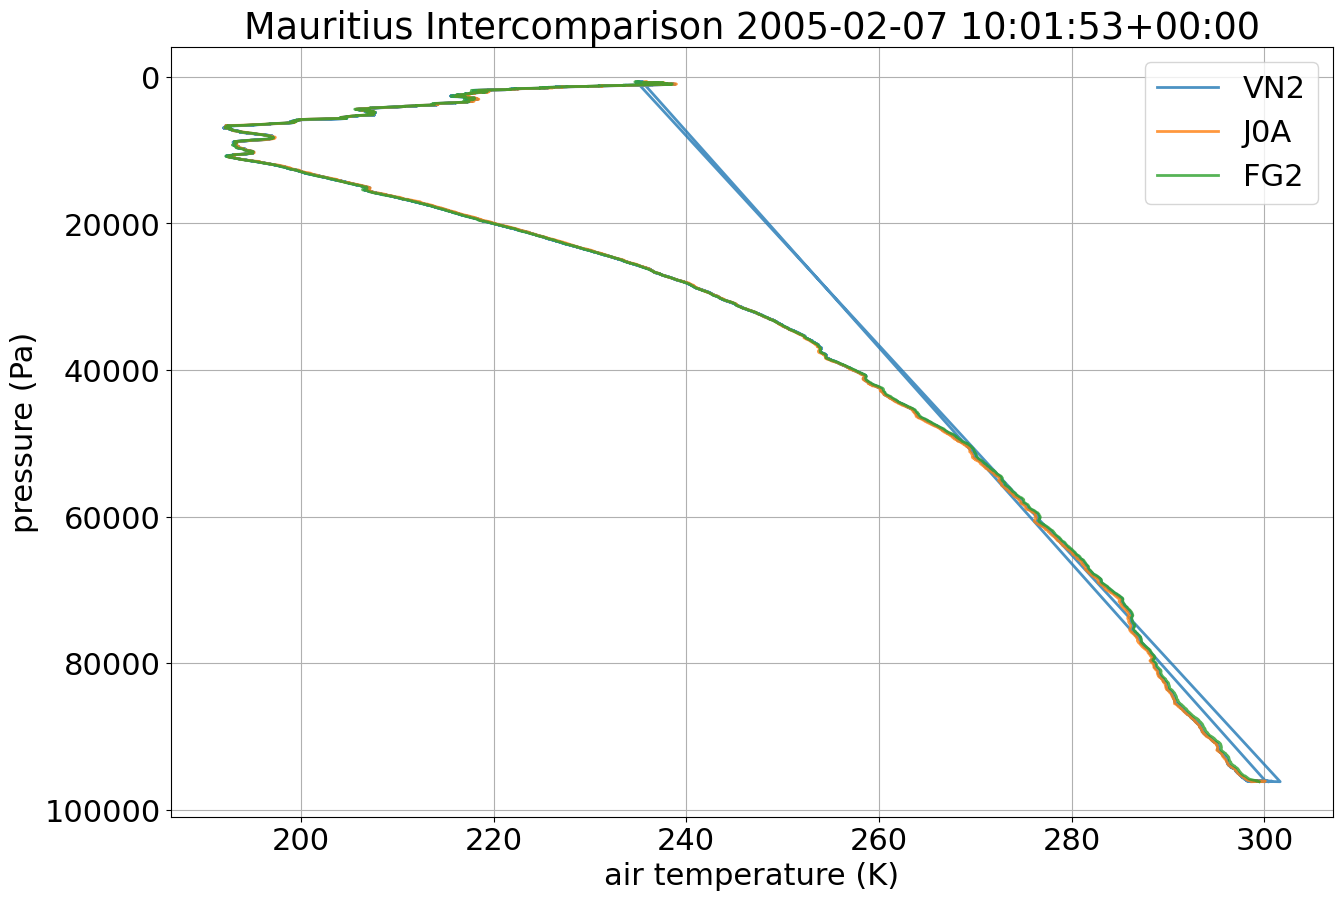

In [33]:
fig, ax1 = maplt.subplots(1, 1, figsize = (15,10))
df_var = df_v14[df_v14.variable == 'air_temperature']
df_var.date_time = pd.to_datetime(df_var.date_time)
for i in df_var.sensor_id.drop_duplicates():
    df = df_var[df_var.sensor_id == i]
    df_p = df[df.date_time.dt.day == 7]
    df_p = df_p[df_p.date_time.dt.hour == 10]
    if len(df_p) > 0:
        ax1.plot(df_p.observation_value, df_p.z_coordinate, alpha = 0.8, linewidth = 2, label=df_p.sensor_id.iloc[0])
        time = df_p.date_time.iloc[0]
ax1.set_ylabel('pressure (Pa)')
ax1.set_xlabel('air temperature (K)')
ax1.legend()
ax1.grid()
maplt.title('Mauritius Intercomparison ' + str(time))
maplt.gca().invert_yaxis()
maplt.show()
maplt.close()

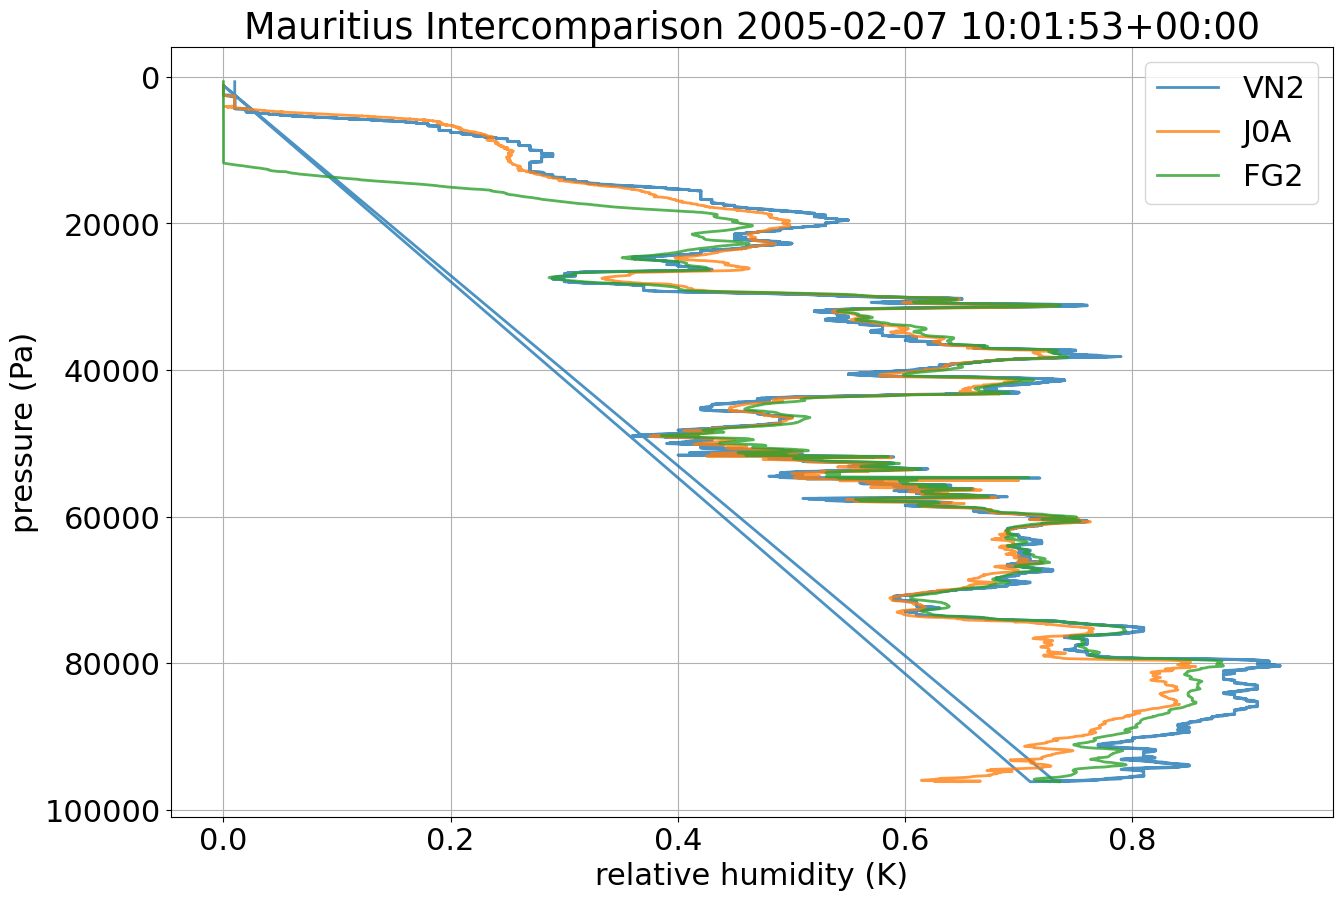

In [34]:
fig, ax1 = maplt.subplots(1, 1, figsize = (15,10))
df_v14 = df_v14[df_v14.variable == 'relative_humidity']
df_v14.date_time = pd.to_datetime(df_v14.date_time)
for i in df_v14.sensor_id.drop_duplicates():
    df = df_v14[df_v14.sensor_id == i]
    df_p = df[df.date_time.dt.day == 7]
    df_p = df_p[df_p.date_time.dt.hour == 10]
    if len(df_p) > 0:
        ax1.plot(df_p.observation_value, df_p.z_coordinate, alpha = 0.8, linewidth = 2, label=df_p.sensor_id.iloc[0])
        time = df_p.date_time.iloc[0]
ax1.set_ylabel('pressure (Pa)')
ax1.set_xlabel('relative humidity (K)')
ax1.legend()
ax1.grid()
maplt.title('Mauritius Intercomparison ' + str(time))
maplt.gca().invert_yaxis()
maplt.show()
maplt.close()

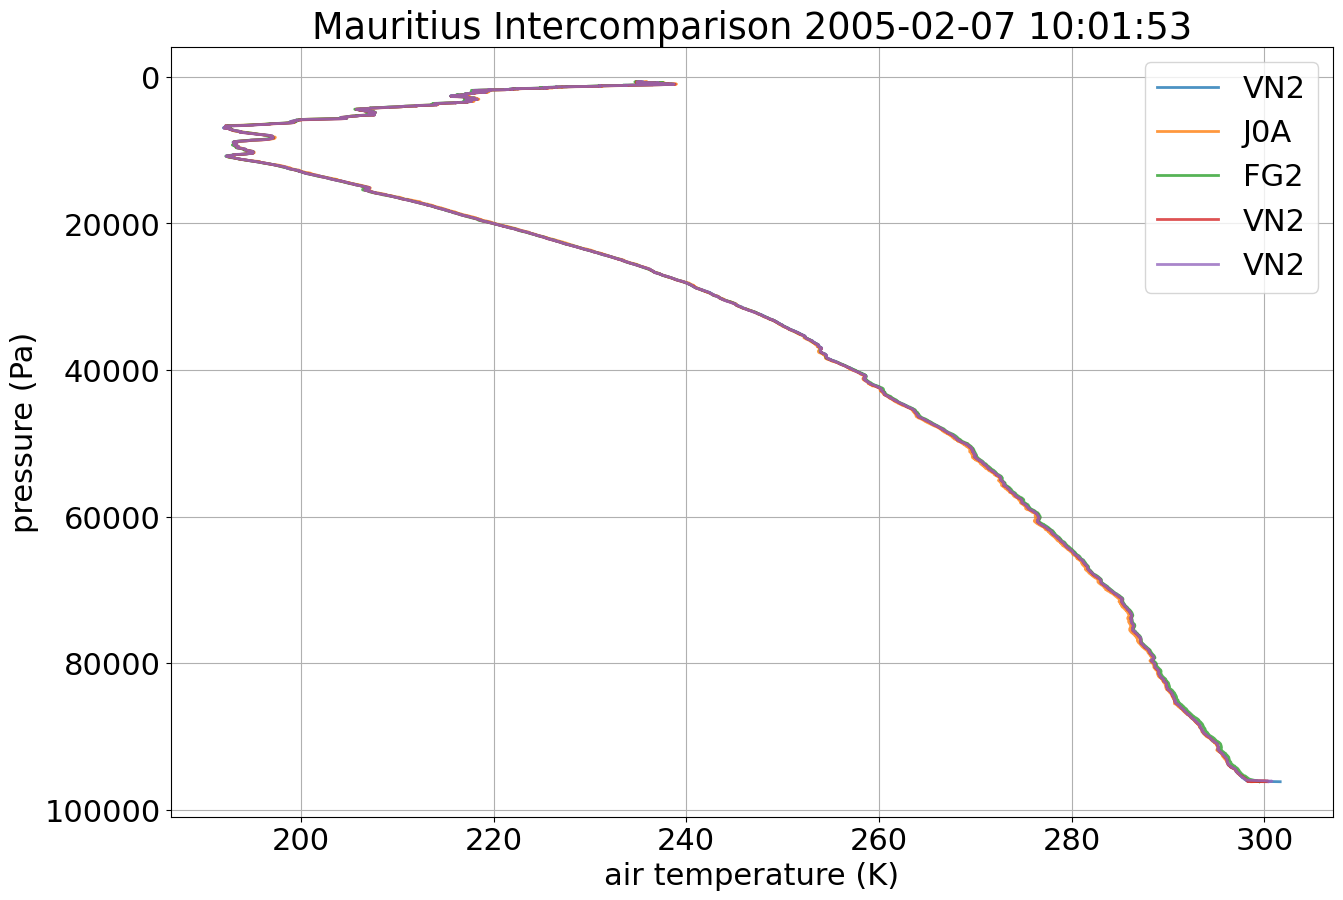

In [3]:
fig, ax1 = maplt.subplots(1, 1, figsize = (15,10))
df = df_v14[i].to_dataframe()
for i in df_v14:
    
    df_p = df[df.time.dt.day == 7]
    df_p = df_p[df_p.time.dt.hour == 10]
    if len(df_p) > 0:
        ax1.plot(df_p.ta, df_p.plev, alpha = 0.8, linewidth = 2, label=df_p.sonde_type.iloc[0])
ax1.set_ylabel('pressure (Pa)')
ax1.set_xlabel('air temperature (K)')
ax1.legend()
ax1.grid()
maplt.title('Mauritius Intercomparison ' + str(df_p.time.iloc[0]))
maplt.gca().invert_yaxis()
maplt.show()
maplt.close()

In [4]:
rq = {
    "statid": ['0-20100-0-019*'],
    "variable": ["relative_humidity"],
    "optional": ['sonde_type'],
}
df_v14 = eua.vm_request_wrapper(rq, overwrite=True)


request took:  27.48581314086914  seconds


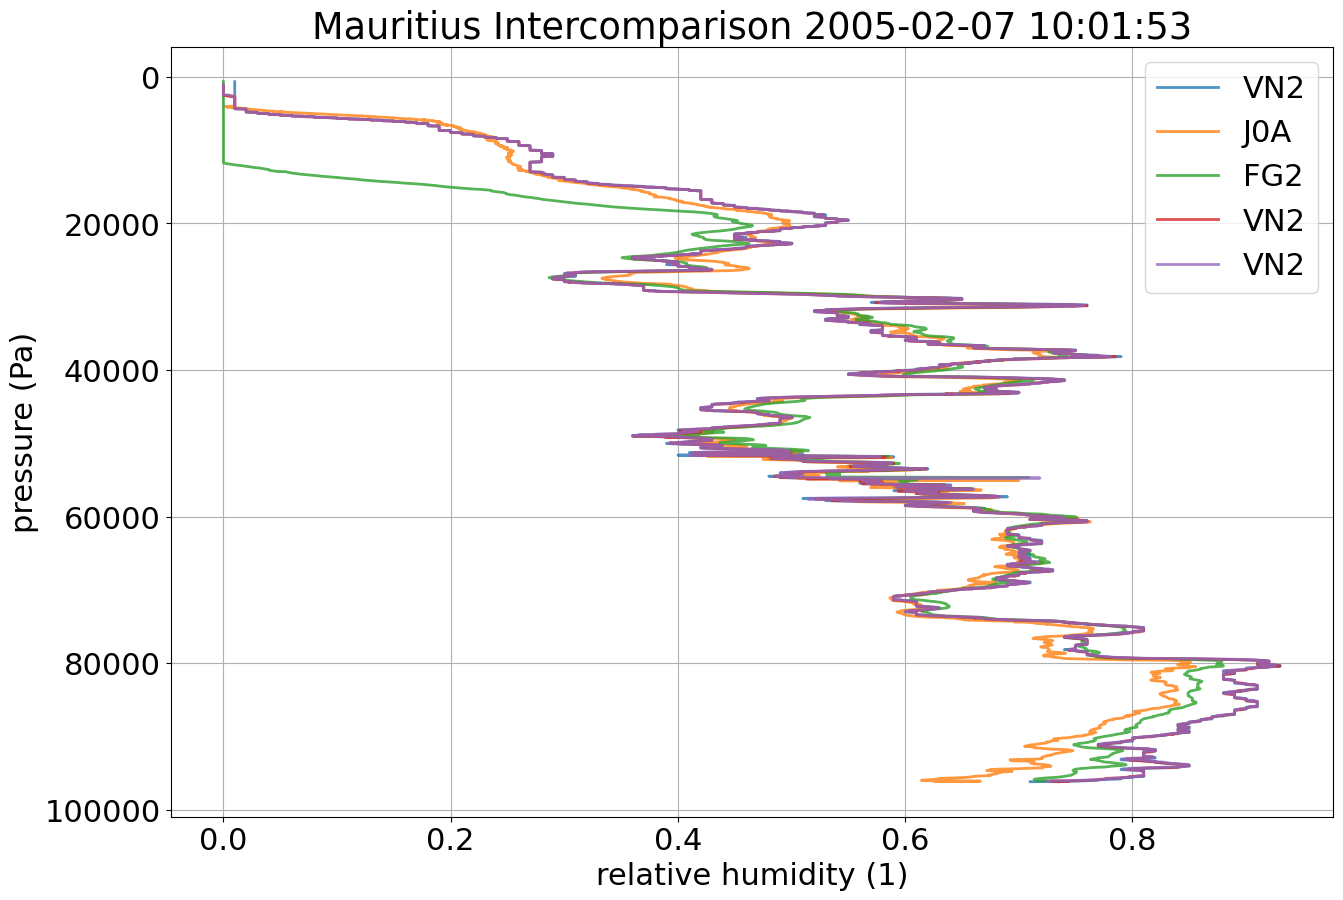

In [5]:
fig, ax1 = maplt.subplots(1, 1, figsize = (15,10))
for i in df_v14:
    df = df_v14[i].to_dataframe()
    
    df_p = df[df.time.dt.day == 7]
    df_p = df_p[df_p.time.dt.hour == 10]
    if len(df_p) > 0:
        ax1.plot(df_p.hur, df_p.plev, alpha = 0.8, linewidth = 2, label=df_p.sonde_type.iloc[0])
ax1.set_ylabel('pressure (Pa)')
ax1.set_xlabel('relative humidity (1)')
ax1.legend()
ax1.grid()
maplt.title('Mauritius Intercomparison ' + str(df_p.time.iloc[0]))
maplt.gca().invert_yaxis()
maplt.show()
maplt.close()

In [2]:
c = cdsapi.Client()

r = c.retrieve(
    "insitu-comprehensive-upper-air-observation-network",
    {
        "format": "csv",
        'variable': [
            'air_temperature', 'relative_humidity', 
        ],
        "statid": ['0-20100-0-020*'],
        "optional": ['sonde_type'],
    },
    'download.csv-lev.zip')

2023-11-22 15:59:53,920 INFO Welcome to the CDS
2023-11-22 15:59:53,921 INFO Sending request to https://cds-test.copernicus-climate.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2023-11-22 15:59:54,055 INFO Request is completed
2023-11-22 15:59:54,055 INFO Downloading https://cds-test-download-0000.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1700665013.745963-8763-2-8a0e9652-4d17-44bd-a2d7-2b3120fc5042.zip to download.csv-lev.zip (14M)
2023-11-22 15:59:54,337 INFO Download rate 49.7M/s  


In [3]:
tempdir = "./tmp/"
delete_dl = True
with zipfile.ZipFile("download.csv-lev.zip", "r") as zip_ref:
    try:
        os.mkdir(tempdir)
    except:
        pass

    zip_ref.extractall(tempdir)

for i in glob.glob(tempdir + "*"):
    print(i)
    df_v14 = pd.read_csv(i, header=14)

if delete_dl:
    shutil.rmtree(tempdir)

./tmp/CDS_CUON_output_file.csv


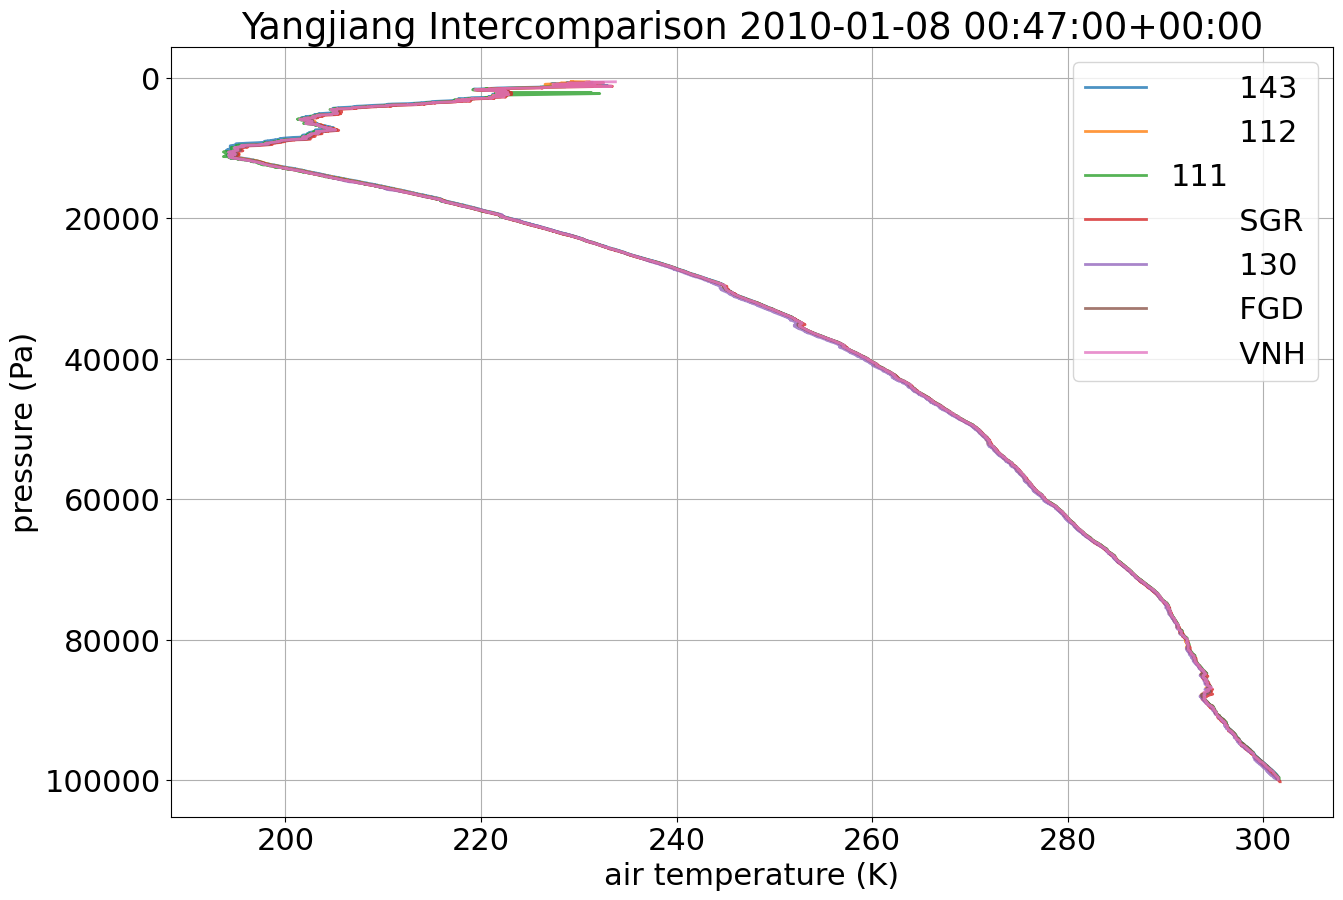

In [5]:
fig, ax1 = maplt.subplots(1, 1, figsize = (15,10))
df_var = df_v14[df_v14.variable == 'air_temperature']
df_var.date_time = pd.to_datetime(df_var.date_time)
for i in df_var.sensor_id.drop_duplicates():
    df = df_var[df_var.sensor_id == i]
    df_p = df[df.date_time.dt.day == 8]
    df_p = df_p[df_p.date_time.dt.hour == 0]
    if len(df_p) > 0:
        ax1.plot(df_p.observation_value, df_p.z_coordinate, alpha = 0.8, linewidth = 2, label=df_p.sensor_id.iloc[0])
        time = df_p.date_time.iloc[0]
ax1.set_ylabel('pressure (Pa)')
ax1.set_xlabel('air temperature (K)')
ax1.legend()
ax1.grid()
maplt.title('Yangjiang Intercomparison ' + str(time))
maplt.gca().invert_yaxis()
maplt.show()
maplt.close()

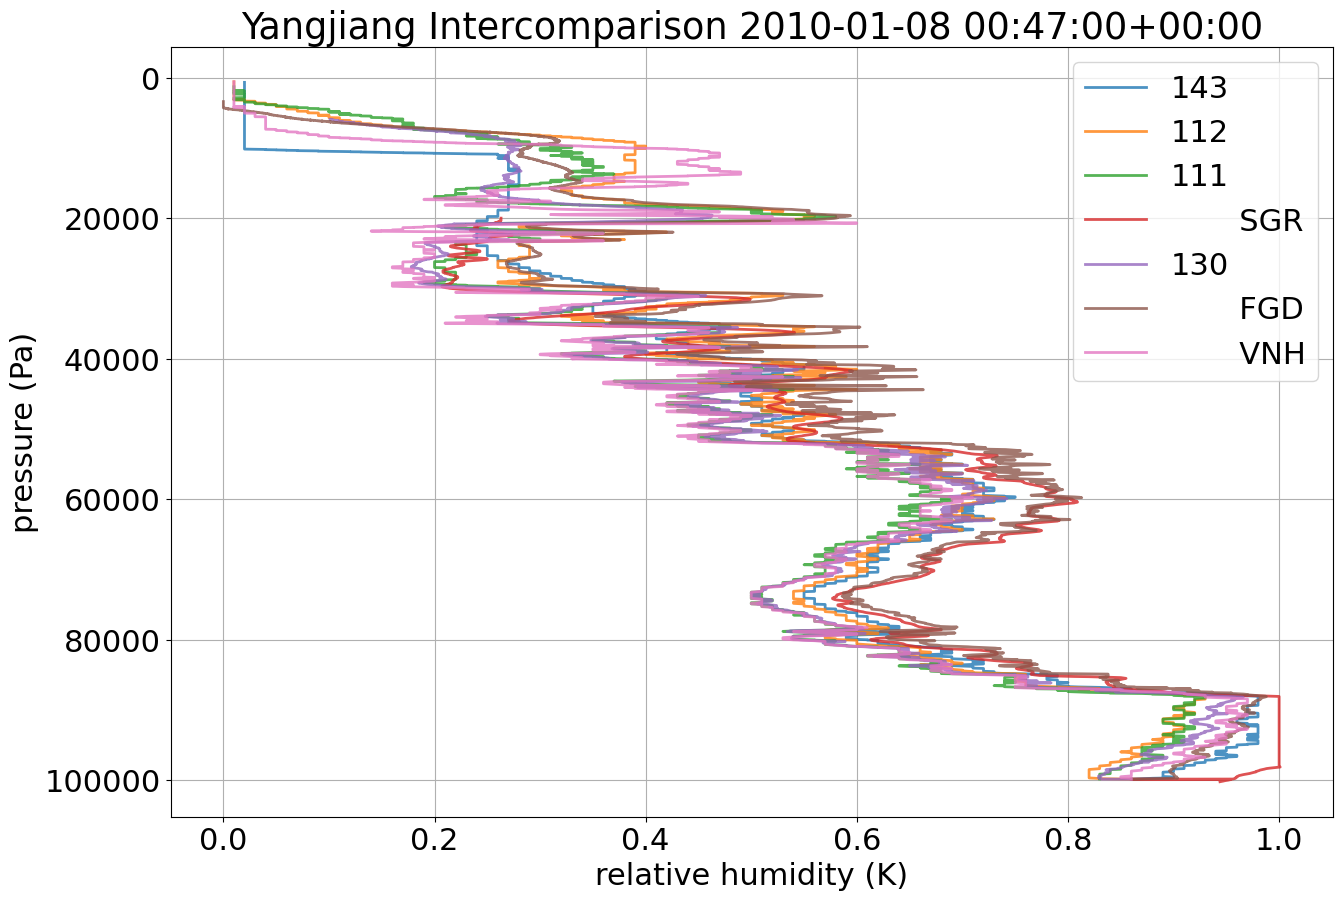

In [6]:
fig, ax1 = maplt.subplots(1, 1, figsize = (15,10))
df_var = df_v14[df_v14.variable == 'relative_humidity']
df_var.date_time = pd.to_datetime(df_var.date_time)
for i in df_var.sensor_id.drop_duplicates():
    df = df_var[df_var.sensor_id == i]
    df_p = df[df.date_time.dt.day == 8]
    df_p = df_p[df_p.date_time.dt.hour == 0]
    if len(df_p) > 0:
        ax1.plot(df_p.observation_value, df_p.z_coordinate, alpha = 0.8, linewidth = 2, label=df_p.sensor_id.iloc[0])
        time = df_p.date_time.iloc[0]
ax1.set_ylabel('pressure (Pa)')
ax1.set_xlabel('relative humidity (K)')
ax1.legend()
ax1.grid()
maplt.title('Yangjiang Intercomparison ' + str(time))
maplt.gca().invert_yaxis()
maplt.show()
maplt.close()

In [6]:
rq = {
    "statid": ['0-20100-0-020*'],
    "variable": ["air_temperature"],
    "optional": ['sonde_type'],
}
df_v14 = eua.vm_request_wrapper(rq, overwrite=True)


request took:  7.784552574157715  seconds


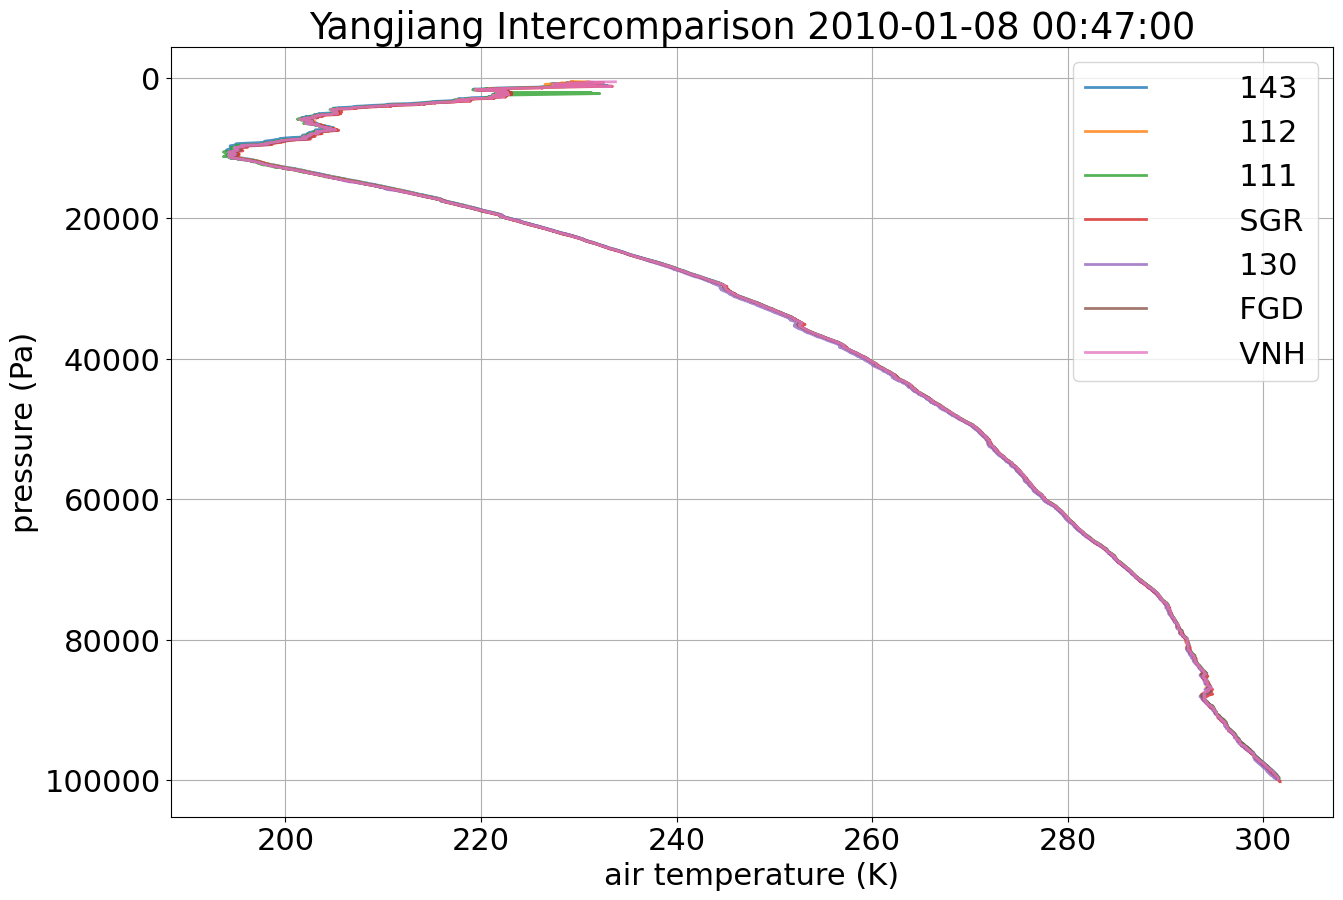

In [7]:
fig, ax1 = maplt.subplots(1, 1, figsize = (15,10))
for i in df_v14:
    df = df_v14[i].to_dataframe()
    df_p = df[df.time.dt.day == 8]
    df_p = df_p[df_p.time.dt.hour == 0]
    if len(df_p) > 0:
        ax1.plot(df_p.ta, df_p.plev, alpha = 0.8, linewidth = 2, label=df_p.sonde_type.iloc[0])
ax1.set_ylabel('pressure (Pa)')
ax1.set_xlabel('air temperature (K)')
ax1.legend()
ax1.grid()
maplt.title('Yangjiang Intercomparison ' + str(df_p.time.iloc[0]))
maplt.gca().invert_yaxis()
maplt.show()
maplt.close()

In [8]:
rq = {
    "statid": ['0-20100-0-020*'],
    "variable": ["relative_humidity"],
    "optional": ['sonde_type'],
}
df_v14 = eua.vm_request_wrapper(rq, overwrite=True)


request took:  8.535418033599854  seconds


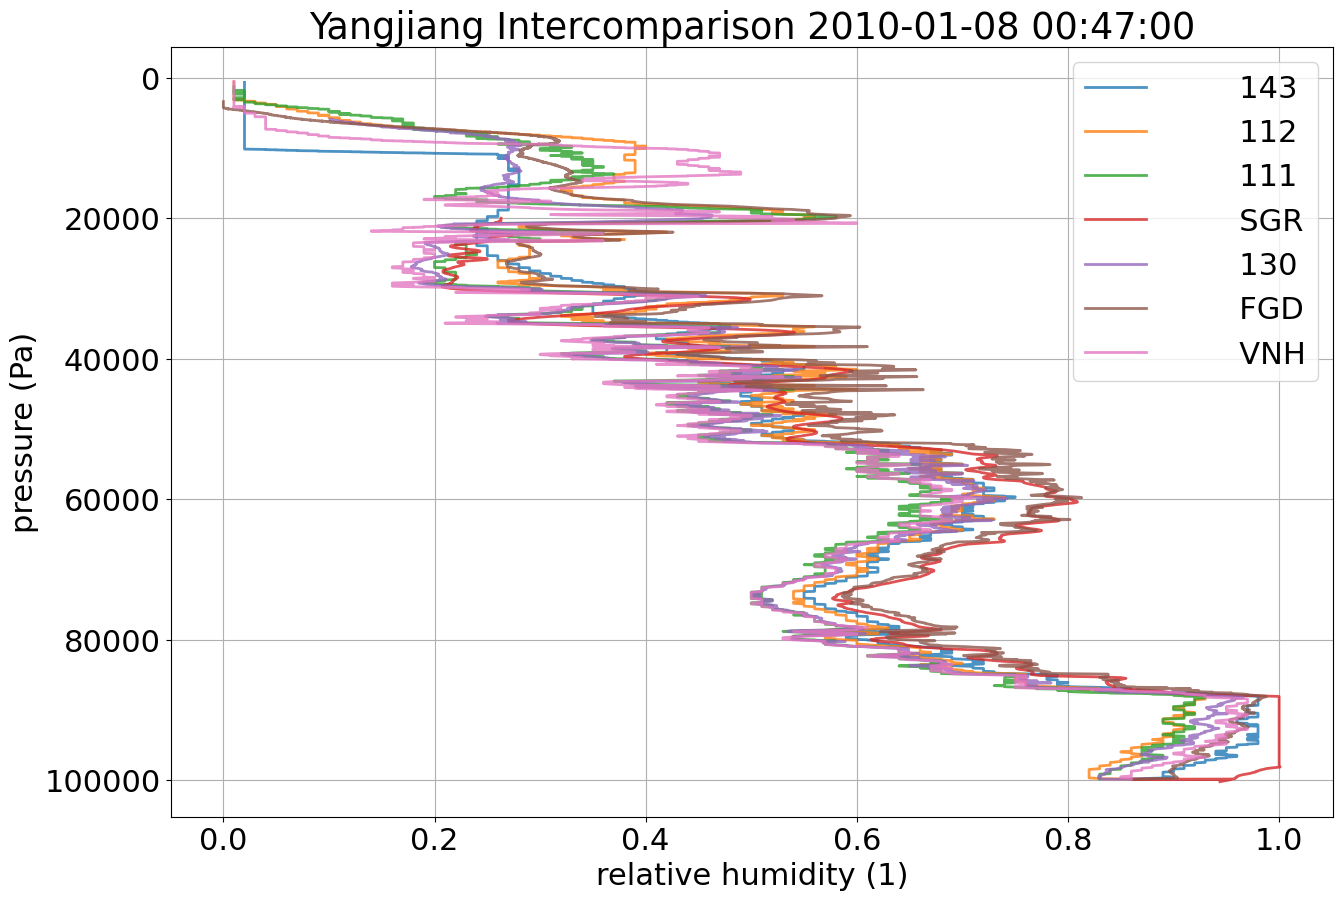

In [10]:
fig, ax1 = maplt.subplots(1, 1, figsize = (15,10))
for i in df_v14:
    df = df_v14[i].to_dataframe()
    df_p = df[df.time.dt.day == 8]
    df_p = df_p[df_p.time.dt.hour == 0]
    if len(df_p) > 0:
        ax1.plot(df_p.hur, df_p.plev, alpha = 0.8, linewidth = 2, label=df_p.sonde_type.iloc[0])
ax1.set_ylabel('pressure (Pa)')
ax1.set_xlabel('relative humidity (1)')
ax1.legend()
ax1.grid()
maplt.title('Yangjiang Intercomparison ' + str(df_p.time.iloc[0]))
maplt.gca().invert_yaxis()
maplt.show()
maplt.close()